#### 人工获取验证码

In [1]:
import requests

rqq = requests.get('https://www.tipdm.org/captcha.svl')  # 获取验证码所在的位置

with open('./captcha.jpg', 'wb') as f:  # 将获取到的验证码保存到本地
    f.write(rqq.content)

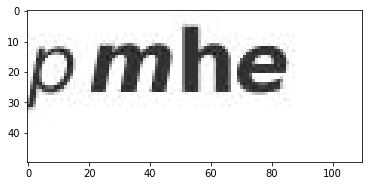

请输入验证码：pmhe


In [2]:
import matplotlib.pyplot as plt

pic = plt.imread('./captcha.jpg')  # 读取本地的验证码
plt.imshow(pic)  # 将验证码转换为可展示的图片
plt.show()  # 展示验证码
a = input('请输入验证码：')  # 根据所爬取的验证码来进行人工输入验证码

In [3]:
proxies = {'http': 'http://1.199.30.211:9999'}  # 设置代理IP的格式，是一个字典类型
requests.get('https://www.baidu.com/', proxies=proxies)  # 用代理IP来请求页面,返回200表示连接请求成功

<Response [200]>

#### 使用POST请求方法登陆

In [4]:
import requests
url = 'http://www.tipdm.org/login.jspx'  # 要登录的页面地址
login = {'username': 'pc2019',
         'password': 'pc2019',
         'captcha': 'zw3t'}
requests.post(url, login)  # login表示要输入的信息,是一个字典类型

<Response [200]>

#### Session会话

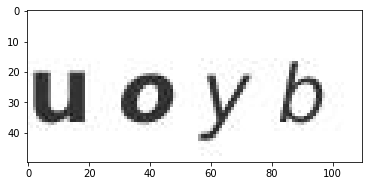

请输入验证码：uoyb


In [5]:
import requests
import matplotlib.pyplot as plt

s = requests.Session()  # 创建一个会话，可以保证操作在同一个客户端下
url = 'https://www.tipdm.org/login.jspx'

rqq = s.get('http://www.tipdm.org/captcha.svl')  # 爬取验证码图片
with open('./captcha.jpg', 'wb') as f:
    f.write(rqq.content)

pic = plt.imread('./captcha.jpg')
plt.imshow(pic)
plt.show()
a = input('请输入验证码：')

login = {'username': 'pc2019',
         'password': 'pc2019',
         'captcha': a}

In [6]:
rqq = s.post(url, data=login)  # data表示要发送的数据

In [7]:
rqq.url  # 通过url来判断是否登录成功，登录成功后会显示一个新的页面地址(登录后的页面地址)

'https://www.tipdm.org/bdrace/index.html'

In [8]:
s.get('https://www.tipdm.org/bdrace/index.html').content.decode('utf8')  # 获取登录后页面地址的源码

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta property="wb:webmaster" content="cd1750b55f4d4463" /><!-- 微博登陆要引用 -->\n<link rel="stylesheet" type="text/css" href="/r/cms/www/red/css/reset.css" />\n<link rel="stylesheet" type="text/css" href="/r/cms/www/red/css/main.css" />\n<script language="javascript" type="text/javascript" src="/r/cms/www/red/js/jquery-1.8.0.min.js"></script>\n<script language="javascript" type="text/javascript" src="/r/cms/www/red/css/jquery.SuperSlide.js"></script>\n<title>BdRace数睿思_数据挖掘竞赛平台</title>\n<meta name="keywords" content="数睿思,数据挖掘竞赛,数据挖掘,大数据,泰迪杯,挑战赛,数据分析师培训,大数据工程师培训,解决方案,人才培养,竞赛平台,数据挖掘项目,数据挖掘教材,大数据教学套件"/>\n<meta name="description" content="“数睿思”数据挖掘竞赛平台（BdRace），专注高校数据挖掘竞技，致力于打造完整大数据生态系统。依托大型的全国性的数据挖掘赛事，汇聚政府、企业、机构、高校、风投等多方资源，为企业提供最优的大数据解决方案，解决企业实际项目需求，选

In [9]:
requests.get('http://www.tipdm.org/member/index.jspx').content.decode('utf8')  # 如果不登陆直接获取登录后的地址源码是获取不到的

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<title>会员登录 - BdRace数睿思_数据挖掘竞赛平台</title>\r\n<link href="/r/cms/front.css" rel="stylesheet" type="text/css"/>\r\n<script src="/r/cms/jquery.js" type="text/javascript"></script>\r\n<script src="/r/cms/front.js" type="text/javascript"></script>\r\n<link rel="stylesheet" type="text/css" href="/r/cms/www/red/css/reset.css" />\r\n<link rel="stylesheet" type="text/css" href="/r/cms/www/red/css/content.css" />\r\n<script src="/r/cms/js/qrcode.js"></script>\r\n<script type="text/javascript">\r\n$(function() {\r\n\t$("#jvForm").validate();\r\n});\r\n</script>\r\n</head>\r\n<body>\r\n<div class="warp">\r\n  <div class="toolbar box">\r\n    <div class="toolbar-inner"> <a class="logo" href=""></a>\r\n      <div class="fr " id="logincontent"> \r\n 

#### 使用浏览器Cookie登陆

In [10]:
# cookies是在实际登录之后用谷歌开发者工具在登录界面所在的Headers下的request headers中复制获取的
# 在代码中使用和实际登录中同一个cookies时，服务器会认为使用程序登录和实际登录的是同一个人
cookie = '_site_id_cookie=1; clientlanguage=zh_CN; uniqueVisitorId=88703bce-839e-beb4-7b98-ddf5017b4c01; username=pc2019; sso_logout=true; JSESSIONID=812869276337E0DECF138834C50DF393'
Cookies = {}  # 定义一个空字典
for i in cookie.split(';'):  # 分割cookie
    key, value = i.split('=')
    Cookies[key] = value  # 向字典中添加对应的值

In [11]:
Cookies

{'_site_id_cookie': '1',
 ' clientlanguage': 'zh_CN',
 ' uniqueVisitorId': '88703bce-839e-beb4-7b98-ddf5017b4c01',
 ' username': 'pc2019',
 ' sso_logout': 'true',
 ' JSESSIONID': '812869276337E0DECF138834C50DF393'}

In [12]:
import requests
# head获取在登录后的界面中使用谷歌开发者工具，在headers下的request headers中的user-agent来复制完成
head = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36'}
# 下面如果不写cookies则源代码中会显示没有登录(使用cookies登录的前提是在浏览器中已经登录过了并产生了cookies)
# 注意cookies有生命周期，需要不断更新
requests.get('http://www.tipdm.org/member/index.jspx', cookies=Cookies, headers=head).content.decode('utf8')  # 通过cookies来登录并输出登录后网页的源代码

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<title>会员登录 - BdRace数睿思_数据挖掘竞赛平台</title>\r\n<link href="/r/cms/front.css" rel="stylesheet" type="text/css"/>\r\n<script src="/r/cms/jquery.js" type="text/javascript"></script>\r\n<script src="/r/cms/front.js" type="text/javascript"></script>\r\n<link rel="stylesheet" type="text/css" href="/r/cms/www/red/css/reset.css" />\r\n<link rel="stylesheet" type="text/css" href="/r/cms/www/red/css/content.css" />\r\n<script src="/r/cms/js/qrcode.js"></script>\r\n<script type="text/javascript">\r\n$(function() {\r\n\t$("#jvForm").validate();\r\n});\r\n</script>\r\n</head>\r\n<body>\r\n<div class="warp">\r\n  <div class="toolbar box">\r\n    <div class="toolbar-inner"> <a class="logo" href=""></a>\r\n      <div class="fr " id="logincontent"> \r\n 

#### 基于表单登录的cookies登录

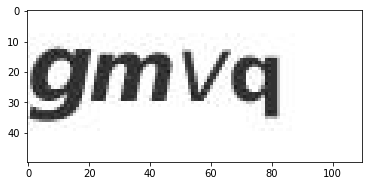

请输入验证码：gmvq
https://www.tipdm.org/bdrace/index.html


In [19]:
import requests
import matplotlib.pyplot as plt
from http.cookiejar import LWPCookieJar

s = requests.Session()  # 同一个session下是同一个cookies
# LWPCookieJar('cookie')表示如果cookies不存在就新建一个cookie文件,这里将cookie保存到指定目录
# 然后将指定目录下的cookie中的内容传递给当前会话的cookies属性中
s.cookies = LWPCookieJar('./cookies/cookie') # 创建完毕后每次进行操作都会被保存到cookie中


url = 'https://www.tipdm.org/login.jspx'

rqq = s.get('https://www.tipdm.org/captcha.svl')
with open('./captcha.jpg', 'wb') as f:
    f.write(rqq.content)

pic = plt.imread('./captcha.jpg')
plt.imshow(pic)
plt.show()
a = input('请输入验证码：')

login = {'username': 'pc2019',  # 相关属性名要进行查看(这里可以通过谷歌开发者工具来查看,这里是name属性的值)
         'password': 'pc2019',
         'captcha': a}
rqq = s.post(url, data=login)
print(rqq.url)  # 检测正常登录
# ignore_discard属性表示即使cookies不存在也加载，默认为False,ignore_expires表示覆盖原有的cookies,默认为false
s.cookies.save(ignore_discard=True, ignore_expires=True)  # save cookies(相关操作会被保存到cookie中)

In [14]:
s.cookies.load(ignore_discard=True, ignore_expires=True)  # 加载cookies

In [20]:
s.get('https://www.tipdm.org/member/index.jspx').content.decode('utf8')

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<title>BdRace数睿思_数据挖掘竞赛平台</title>\n<link type="text/css" rel="stylesheet" href="/r/cms/www/red/css/index.css" />\n<link href="/r/cms/front.css" rel="stylesheet" type="text/css"/>\n<script src="/r/cms/jquery.js" type="text/javascript"></script>\n<script src="/r/cms/front.js" type="text/javascript"></script>\n<!--[if lt IE 9]> \n<script src="/r/cms/www/red/js/html5shiv.min.js"></script>\n<script src="/r/cms/www/red/js/respond.min.js"></script>\n<![endif]-->\n</head>\n<body>\n<script src="/r/cms/easyui/plugins/jquery.form.js" type="text/javascript"></script>\n<script src="/r/cms/easyui/plugins/jquery.validate.js" type="text/javascript"></script>\n<script src="/r/cms/front.js